# UnderspecificationAnalysis User Guide
The UnderspecificationAnalysis package contains methods that help to diagnose and illustrate potential model underspecification. This notebook demonstrates how to use this package along side a breast cancer subtyping dataset from METABRIC.  

In [64]:
%load_ext autoreload
%autoreload 2

## Imports
Importing necessary libraries for processing the sample dataset and importing the UnderspecificationAnalysis class.

In [127]:
import warnings
warnings.filterwarnings('ignore')

In [128]:
import pandas as pd

In [119]:
from underspecification import PUMP

## Data Processing
Loading and pre-processing the lung cancer diagnosis dataset from TCGA. The labels were manually added in prior to loading into this notebook, so the method to extract the labels is not traditional. We also want to make sure all entries are valid, so we need the complete dataset Xy along with the separate X and y for later use.

In [98]:
X = pd.read_csv('/large/metabric/expression_with_gene_ids_min_max_no_pam50.csv.gz')
X.set_index('Sample ID',inplace=True)
df = pd.read_csv('brca_metabric_clinical_data.tsv',sep='\t')
df = df.loc[df['Pam50 + Claudin-low subtype']!='NC']
df.set_index('Sample ID',inplace=True)
y = df['Pam50 + Claudin-low subtype']
Xy = X.join(y).dropna()
X = Xy.drop(['Pam50 + Claudin-low subtype'], axis=1)
y = Xy['Pam50 + Claudin-low subtype']
Xy

,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AACSP1,AADAC,AADACL2,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,Pam50 + Claudin-low subtype
Sample ID,,,,,,,,,,,,,,,,,,,,,
MB-0362,0.121975,0.215056,0.137268,0.319299,0.299318,0.379480,0.412660,0.361855,0.101269,0.172184,...,0.299784,0.362357,0.225769,0.367554,0.132938,0.328175,0.573906,0.539070,0.147249,LumA
MB-0346,0.192559,0.042307,0.204485,0.103171,0.315292,0.391824,0.544226,0.372350,0.087123,0.164404,...,0.516268,0.489675,0.363120,0.457905,0.155936,0.121523,0.483270,0.411438,0.224434,Her2
MB-0386,0.129016,0.302035,0.104212,0.478857,0.307694,0.265761,0.191160,0.214396,0.124491,0.135946,...,0.210737,0.420390,0.164456,0.268026,0.169930,0.358189,0.616131,0.515510,0.124535,LumA
MB-0574,0.186569,0.204583,0.084922,0.155657,0.259502,0.225779,0.276242,0.363504,0.156255,0.174428,...,0.211609,0.669651,0.530200,0.548744,0.054719,0.364991,0.480279,0.564949,0.158037,LumA
MB-0185,0.110777,0.337835,0.133802,0.265908,0.555257,0.349347,0.222268,0.381949,0.058114,0.111793,...,0.450318,0.644640,0.280082,0.305045,0.135671,0.259829,0.531486,0.503557,0.165486,LumB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MB-5453,0.123899,0.758462,0.111082,0.388901,0.469854,0.265111,0.292791,0.374861,0.112473,0.143079,...,0.152024,0.339924,0.262486,0.398045,0.006885,0.645722,0.706595,0.673984,0.413533,Normal
MB-5471,0.086833,0.383323,0.148131,0.455040,0.424542,0.264008,0.323045,0.466199,0.133736,0.111767,...,0.336048,0.578365,0.360607,0.409253,0.134941,0.489436,0.784043,0.524229,0.346266,LumA
MB-5127,0.161060,0.322914,0.089267,0.249016,0.506120,0.347471,0.262816,0.313490,0.136973,0.124235,...,0.125430,0.612635,0.566129,0.497388,0.125114,0.708827,0.548029,0.537391,0.362411,LumB


## Initializing PUMP
Since PUMP is a Python library, this is a typical way to initialize the class. We set the general data directory to be 'data/'

In [120]:
pump = PUMP(output_dir='data')

## Data Analysis
After multiple trials, we believe this run with these parameters produces a generally decent cluster analysis on the dataset. These parameters will be utilized for shifting the datasets afterwards. Upon viewing the output files in data/data_analysis, we concluded that having 3 clusters on HER2 was a good way to separate the data points.

Running PCA Analysis ...
Running K-means Analysis ...
Writing Cluster Analysis ...
-----[ COMPLETE ]-----
Check /data/data_analysis for the results.


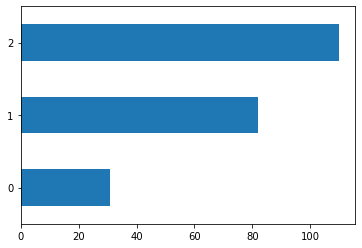

In [124]:
Xy_filtered = pump.analyze_dataset(X, y, methods=['clustering'], cluster_focus='Her2', subdirectory='data_analysis', num_clusters=3)

## Shifted Stress Testing
Knowing that we prefer the 3 clusters on HER2, we want to create shifted datasets around HER2 to stress test models. We choose to have 50 shifted sets per cluster and an 80-20 train-test split (70-10 for train-val). The datasets can be viewed in 'data/indices'.

In [125]:
pump.create_shifted_datasets(X, y, Xy_filtered,
                             num_clusters=3,
                             shift_type='clustering',
                             split_ratio=[0.7,0.1,0.2],
                             cluster_focus='Her2',
                             subdirectory='indices',
                             num_shifted_sets=50
)

Creating shifted sets ...
Writing out sets ...
-----[ COMPLETE ]-----
Check /data/indices for the results.


## Performance Evaluation
PUMP provides a variety of options in terms of evaluating performances on shifted datasets. Currently, PUMP supports the following models:
* SVM: (Linear) Supoprt Vector Machines
* RF: Random Forest
* MLP: Neural Network (Multi-Layer Perceptron)

For the purpose of this notebook, we will train on Random Forest with random states 0-2. The performance metrics can be viewed in 'data/results/'.

In [129]:
pump.evaluate_shifted_sets(X, y, subdirectory='results', models=['rf'], random_states=[0, 1, 2])

Evaluating models ...
    Evaluating: data/indices/1,True/index_df_14.csv
    Evaluating: data/indices/1,True/index_df_46.csv
    Evaluating: data/indices/1,True/index_df_49.csv
    Evaluating: data/indices/1,True/index_df_6.csv
    Evaluating: data/indices/1,True/index_df_11.csv
    Evaluating: data/indices/1,True/index_df_9.csv
    Evaluating: data/indices/1,True/index_df_30.csv
    Evaluating: data/indices/1,True/index_df_34.csv
    Evaluating: data/indices/1,True/index_df_47.csv
    Evaluating: data/indices/1,True/index_df_28.csv
    Evaluating: data/indices/1,True/index_df_3.csv
    Evaluating: data/indices/1,True/index_df_17.csv
    Evaluating: data/indices/1,True/index_df_41.csv
    Evaluating: data/indices/1,True/index_df_31.csv
    Evaluating: data/indices/1,True/index_df_45.csv
    Evaluating: data/indices/1,True/index_df_32.csv
    Evaluating: data/indices/1,True/index_df_18.csv
    Evaluating: data/indices/1,True/index_df_36.csv
    Evaluating: data/indices/1,True/index_df_

## Discrepancy Graphs
To better analyze the results, let's visualize the Random Forest performances on the shifted datasets. The graphs can be viewed in 'data/results/'.

In [131]:
pump.plot_shifted_results(filename='rf_results.csv', subdirectory='results')

## Model Selection
Finally, we will select the top 10 models on the HER2 subtype. Note: a DataFrame is returned instead of written out. 

In [132]:
pump.select_top_models(filename='rf_results.csv', subdirectory='results', num_models=10, class_filter='Her2')

class  rep  seed cluster  avg f1-score - f1-score (unshifted)
cluster rep                                                              
2       0    Her2    0    25       2                            -0.426667
        2    Her2    2    12       2                            -0.051332
0       1    Her2    1     4       0                            -0.042912
        0    Her2    0     4       0                            -0.037948
2       1    Her2    1     4       2                            -0.028826
0       2    Her2    2     4       0                            -0.026966
1       1    Her2    1    19       1                            -0.018457
        2    Her2    2    19       1                            -0.014047
        0    Her2    0    19       1                            -0.008451